# 🏥 Lab 4: Medical Imaging Standards - DICOM & HL7

**AI in Medicine and Healthcare**  
**Insper Instituto de Ensino e Pesquisa**  
**Week 4 - Class 7**

---

## 📝 Student Information (REQUIRED)

**Student 1:**
- Name: Rodrigo Paoliello de Medeiros
- Email: rodrigopm6@al.insper.edu.br

**Student 2:**
- Name: Pedro Civita
- Email: pedrotpc@al.insper.edu.br

**Date Submitted:** 24/02/2026

---

## 🎯 Today's Mission

**Learn to work with real medical data formats!**

You've been building AI models for medical images. But where do these images come from? How are they stored? What other information comes with them?

**Today you'll learn:**
- 📁 How to read and manipulate DICOM files (medical image standard)
- 🖼️ How to properly display medical images with windowing
- 📊 How to extract valuable metadata
- 📡 How to parse HL7 messages (clinical data exchange)
- 🔗 How DICOM and HL7 work together in hospitals

---

## ⏱️ Time Allocation

- **Part 1:** DICOM Basics (30 min)
- **Part 2:** Image Windowing & Visualization (20 min)
- **Part 3:** 3D Volumes (15 min)
- **Part 4:** HL7 Messages (15 min)
- **Part 5:** Integration (10 min)

**Total:** 90 minutes

---

# 🚀 Setup: Install Required Libraries

In [137]:
# Install necessary packages
!pip install -q pydicom numpy matplotlib pillow

print("✓ Libraries installed successfully!")

✓ Libraries installed successfully!


In [138]:
# Import libraries
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from datetime import datetime

# Set plotting style
plt.style.use('default')

print(f"pydicom version: {pydicom.__version__}")
print(f"numpy version: {np.__version__}")
print("\n✓ All imports successful!")

pydicom version: 3.0.1
numpy version: 2.0.2

✓ All imports successful!


---

# 📁 PART 1: DICOM Basics (30 minutes)

## What is DICOM?

**DICOM** = Digital Imaging and Communications in Medicine

**Key Facts:**
- International standard for medical images
- Used by ALL medical imaging devices worldwide
- Contains both **metadata** (patient info, acquisition parameters) and **pixel data** (the actual image)

**Structure:**
```
DICOM File
├── Header (Metadata)
│   ├── Patient Information
│   ├── Study Information
│   ├── Image Parameters
│   └── Equipment Details
└── Pixel Data (The image)
```

---

## Step 1.1: Download Sample DICOM Files

We'll use sample medical images from a public dataset. Look into the `dicom` folder. **You will find 6 DICOM files. You should experiment with the CT dataset and 1 MR dataset!**

In [139]:
# Download sample DICOM files
!gdown 1otAqpY-vn3rlZZSKSwLyUM7sb-bM6lHE
!unzip -q dicom.zip

# Verify the file exists
if os.path.exists('dicom'):
    print("✓ Sample DICOM file downloaded successfully!")
else:
    print("❌ Download failed. Please check your internet connection.")

Downloading...
From (original): https://drive.google.com/uc?id=1otAqpY-vn3rlZZSKSwLyUM7sb-bM6lHE
From (redirected): https://drive.google.com/uc?id=1otAqpY-vn3rlZZSKSwLyUM7sb-bM6lHE&confirm=t&uuid=e57ac15e-9805-4fcb-a120-2a9219bcb94b
To: /content/dicom.zip
100% 62.3M/62.3M [00:00<00:00, 179MB/s]
replace dicom/IMG-0001-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/dicom/._IMG-0001-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dicom/IMG-0002-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/dicom/._IMG-0002-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dicom/1-01.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/dicom/._1-01.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dicom/IMG-0004-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/dicom/._IMG-0004-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dicom/IMG-0003-00001.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACO

## Step 1.2: Load a DICOM File

**TODO:** Use pydicom to load a DICOM file and explore its basic properties.

In [141]:
# Load the DICOM file
# Using pydicom.dcmread to read a CT DICOM file from the dicom folder

dicom_dir = 'dicom'
dicom_files = [f for f in os.listdir(dicom_dir) if f.endswith('.dcm')]
print(f"Available DICOM files: {dicom_files}")

# Load a CT file (pick one with 'CT' in the name, or the first available)
ct_files = [f for f in dicom_files if 'CT' in f.upper()]
chosen_file = ct_files[0] if ct_files else dicom_files[0]
dcm = pydicom.dcmread(os.path.join(dicom_dir, chosen_file))

print(f"\nLoaded file: {chosen_file}")

# Print basic information
print("\nBasic DICOM Information:")
print("=" * 60)
print(f"Patient Name: {dcm.PatientName}")
print(f"Patient ID: {dcm.PatientID}")
print(f"Modality: {dcm.Modality}")
print(f"Study Date: {dcm.StudyDate}")
print(f"Study Time: {dcm.get('StudyTime', 'N/A')}")

print("\n✓ DICOM file loaded successfully!")

Available DICOM files: ['IMG-0002-00001.dcm', '1-01.dcm', 'IMG-0005-00001.dcm', 'IMG-0003-00001.dcm', 'IMG-0004-00001.dcm', 'IMG-0001-00001.dcm']

Loaded file: IMG-0002-00001.dcm

Basic DICOM Information:
Patient Name: Ultra_fast_Brain
Patient ID: Ultra_fast_Brain
Modality: MR
Study Date: 20240808
Study Time: 172451.800000

✓ DICOM file loaded successfully!


## Step 1.3: Explore DICOM Tags

Every piece of information in DICOM has a unique **tag** in format `(Group, Element)`.

**TODO:** Print the DICOM tags and their values.

In [142]:
# Print all DICOM tags

print("Complete DICOM Dataset:")
print("=" * 60)
print(dcm)

# Common tags you might want to explore:
# (0010,0010) - Patient Name
# (0008,0060) - Modality
# (0028,0010) - Rows
# (0028,0011) - Columns
# (7FE0,0010) - Pixel Data

Complete DICOM Dataset:
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.50.176591.30000024080816514944800000041
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002,0013) Implementation Version Name         SH: 'SYNGO_MR_XA50A'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NONE']
(0008,0012) Instance Creation Date              DA: '20240808'
(0008,0013) Instance Creation Time              TM: '172712.392500'
(0008,0016) SOP Class UID                       UI: Enhanced MR Im

## Step 1.4: Extract Key Metadata

**TODO:** Create a function to extract and display important metadata in a clean format.

In [143]:
# Create a metadata extraction function

def extract_dicom_metadata(dcm):
    """
    Extract and organize key DICOM metadata

    Args:
        dcm: pydicom dataset object

    Returns:
        dict: Organized metadata
    """
    metadata = {
        'Patient Info': {
            'Name': str(dcm.get('PatientName', 'N/A')),
            'ID': str(dcm.get('PatientID', 'N/A')),
            'Birth Date': str(dcm.get('PatientBirthDate', 'N/A')),
            'Sex': str(dcm.get('PatientSex', 'N/A')),
            'Age': str(dcm.get('PatientAge', 'N/A'))
        },
        'Study Info': {
            'Date': str(dcm.get('StudyDate', 'N/A')),
            'Time': str(dcm.get('StudyTime', 'N/A')),
            'Description': str(dcm.get('StudyDescription', 'N/A')),
            'Modality': str(dcm.get('Modality', 'N/A'))
        },
        'Image Info': {
            'Rows': str(dcm.get('Rows', 'N/A')),
            'Columns': str(dcm.get('Columns', 'N/A')),
            'Pixel Spacing': str(dcm.get('PixelSpacing', 'N/A')),
            'Slice Thickness': str(dcm.get('SliceThickness', 'N/A'))
        },
        'Equipment': {
            'Manufacturer': str(dcm.get('Manufacturer', 'N/A')),
            'Model': str(dcm.get('ManufacturerModelName', 'N/A')),
            'Software Version': str(dcm.get('SoftwareVersions', 'N/A'))
        }
    }

    return metadata

# Test the function
if dcm is not None:
    metadata = extract_dicom_metadata(dcm)

    print("\nExtracted Metadata:")
    print("=" * 60)
    for category, info in metadata.items():
        print(f"\n{category}:")
        for key, value in info.items():
            print(f"  {key:<20}: {value}")


Extracted Metadata:

Patient Info:
  Name                : Ultra_fast_Brain
  ID                  : Ultra_fast_Brain
  Birth Date          : 19940808
  Sex                 : M
  Age                 : 030Y

Study Info:
  Date                : 20240808
  Time                : 172451.800000
  Description         : Volunteer Siemens RC
  Modality            : MR

Image Info:
  Rows                : 672
  Columns             : 548
  Pixel Spacing       : N/A
  Slice Thickness     : N/A

Equipment:
  Manufacturer        : Siemens Healthineers
  Model               : MAGNETOM Vida
  Software Version    : syngo MR XA50


## Step 1.5: Display the Image

**TODO:** Extract the pixel data and display it as an image.

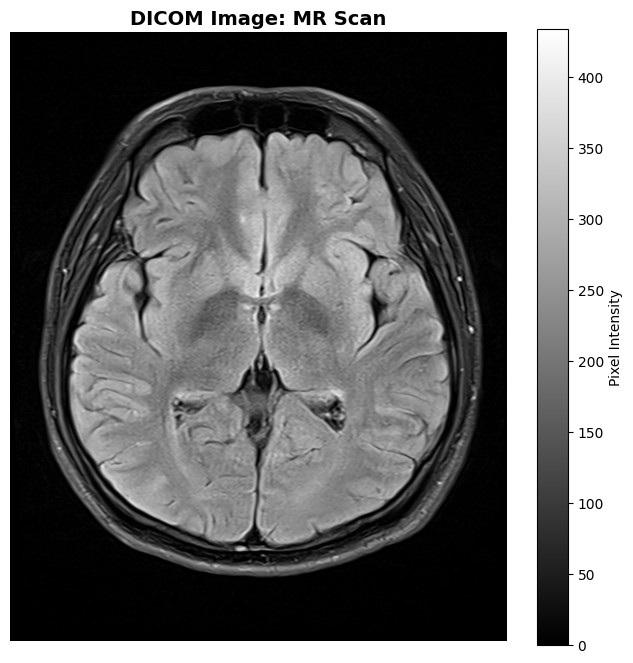


Image Information:
  Shape: (21, 672, 548)
  Data type: uint16
  Min value: 0
  Max value: 910


In [144]:
# Extract pixel data from DICOM
pixel_array = dcm.pixel_array

# Display the image
if pixel_array is not None:
    # If multi-frame, show the middle slice; otherwise show the 2D image
    display_img = pixel_array[pixel_array.shape[0] // 2] if pixel_array.ndim == 3 else pixel_array

    plt.figure(figsize=(8, 8))
    plt.imshow(display_img, cmap='gray')
    plt.title(f'DICOM Image: {dcm.get("Modality", "Unknown")} Scan', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.colorbar(label='Pixel Intensity')
    plt.show()

    print(f"\nImage Information:")
    print(f"  Shape: {pixel_array.shape}")
    print(f"  Data type: {pixel_array.dtype}")
    print(f"  Min value: {pixel_array.min()}")
    print(f"  Max value: {pixel_array.max()}")

## 🎉 Part 1 Complete!

**Checkpoint:**
- ✅ Loaded a DICOM file
- ✅ Explored DICOM tags
- ✅ Extracted metadata
- ✅ Displayed the image

**Key Insight:** DICOM files contain much more than just images - they're complete medical records!

---

---

# 🖼️ PART 2: Image Windowing & Visualization (20 minutes)

## What is Windowing?

Medical images (especially CT scans) have a wide range of pixel values. **Windowing** adjusts which range of values we display to see different tissues clearly.

**Common CT Windows:**
- **Brain:** Window=80, Level=40 (see brain tissue)
- **Lung:** Window=1500, Level=-600 (see lung detail)
- **Bone:** Window=2000, Level=300 (see fractures)
- **Soft Tissue:** Window=400, Level=40 (see organs)

**Why this matters:**
Same scan, different windows = different diagnoses possible!

---

## Step 2.1: Apply Hounsfield Units (CT Only)

For CT scans, pixel values need to be converted to **Hounsfield Units (HU)**.

**Formula:** `HU = pixel_value * RescaleSlope + RescaleIntercept`

**TODO:** Convert pixel values to Hounsfield Units. **Attention**: The CT dataset will contain outside-of-scan pixels

In [145]:
# Check if this is a CT scan
is_ct = dcm.Modality == 'CT' if dcm is not None else False

if is_ct:
    # Apply Hounsfield Unit conversion
    # Some DICOM files may not have RescaleSlope/Intercept - assume slope=1 and intercept=0
    slope = float(dcm.get('RescaleSlope', 1.0))
    intercept = float(dcm.get('RescaleIntercept', 0.0))

    # Get the pixel array (use middle slice if 3D)
    raw_pixels = pixel_array[pixel_array.shape[0] // 2].astype(np.float64) if pixel_array.ndim == 3 else pixel_array.astype(np.float64)

    # Handle out-of-scan pixels: pixels with intensity <= -2000 are outside the scan
    raw_pixels[raw_pixels <= -2000] = 0

    # Calculate Hounsfield Units: HU = pixel_value * slope + intercept
    hu_image = raw_pixels * slope + intercept

    print(f"Rescale Slope: {slope}")
    print(f"Rescale Intercept: {intercept}")
    print(f"\nHounsfield Units range: {hu_image.min()} to {hu_image.max()}")
else:
    print("Not a CT scan - Hounsfield Units not applicable")
    hu_image = pixel_array[pixel_array.shape[0] // 2].astype(np.float64) if pixel_array.ndim == 3 else pixel_array.astype(np.float64)

Not a CT scan - Hounsfield Units not applicable


## Step 2.2: Implement Windowing Function

**TODO:** Create a function to apply window/level to an image.

In [146]:
# Implement windowing function

def apply_window(image, window_center, window_width):
    """
    Apply window/level to a medical image

    Args:
        image: Input image (numpy array)
        window_center: Center of the window (level)
        window_width: Width of the window

    Returns:
        Windowed image normalized to [0, 1]
    """
    # Calculate min and max values of the window
    img_min = window_center - window_width / 2
    img_max = window_center + window_width / 2

    # Clip the image to the window range and normalize to [0, 1]
    windowed = np.clip(image, img_min, img_max)
    windowed = (windowed - img_min) / (img_max - img_min)

    return windowed

# Test the function
print("✓ Windowing function created")

✓ Windowing function created


## Step 2.3: Display with Different Windows

**TODO:** Display the same image with different window settings to see how it affects visualization.

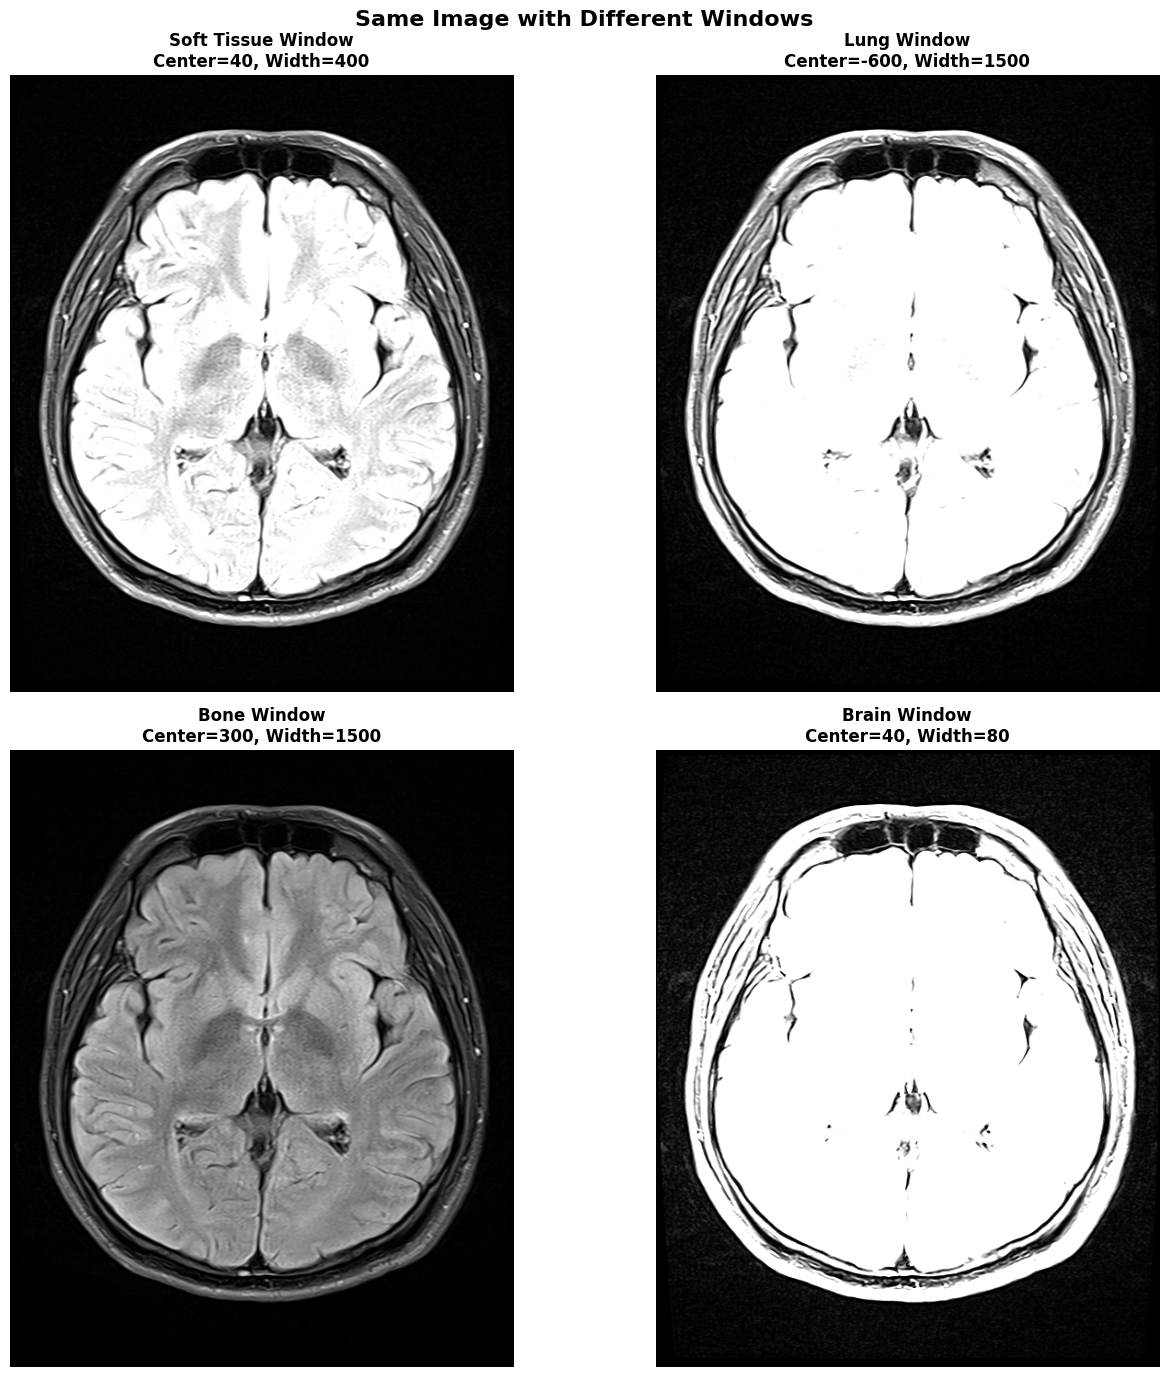


🔍 Observation:
Notice how the same image looks completely different!
This is why radiologists use different windows for different diagnoses.


In [147]:
# Apply different windows and display

if hu_image is not None:
    # Define window settings
    windows = {
        'Soft Tissue': (40, 400),
        'Lung': (-600, 1500),
        'Bone': (300, 1500),
        'Brain': (40, 80)
    }

    # Create a 2x2 subplot to show all windows
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    axes = axes.ravel()

    for idx, (name, (center, width)) in enumerate(windows.items()):
        # Apply windowing
        windowed_img = apply_window(hu_image, center, width)

        # Display the windowed image
        axes[idx].imshow(windowed_img, cmap='gray')
        axes[idx].set_title(f'{name} Window\nCenter={center}, Width={width}',
                           fontsize=12, fontweight='bold')
        axes[idx].axis('off')

    plt.suptitle('Same Image with Different Windows', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n🔍 Observation:")
    print("Notice how the same image looks completely different!")
    print("This is why radiologists use different windows for different diagnoses.")

## 🎉 Part 2 Complete!

**Checkpoint:**
- ✅ Applied Hounsfield Unit conversion (for CT)
- ✅ Implemented windowing function
- ✅ Displayed image with multiple windows

**Key Insight:** The SAME pixels can reveal different anatomy depending on window settings!

---

---

# 🏗️ PART 3: Working with 3D Volumes (15 minutes)

## DICOM Series

Medical scans are usually **3D volumes** made of many 2D slices:
- CT scan of chest: 100-300 slices
- MRI of brain: 20-50 slices per sequence

Each slice is a separate DICOM file!

**Hierarchy:**
```
Patient → Study → Series → Instances (individual slices)
```

---

## Step 3.1: Create Multi-Slice Data

Load a multi-frame MR image to show the individual slices.

In [148]:
# Create a simple 3D volume for demonstration

# Load pixel array from the DICOM file
num_slices = dcm.pixel_array.shape[0] if pixel_array is not None and pixel_array.ndim == 3 else 1

if pixel_array is not None and pixel_array.ndim == 3:
    # The pixel array is already a 3D volume (multi-frame)
    volume = pixel_array.astype(np.float64)
    print(f"Created sample 3D volume with shape: {volume.shape}")
    print(f"  Number of slices: {volume.shape[0]}")
    print(f"  Each slice size: {volume.shape[1]} × {volume.shape[2]}")
elif pixel_array is not None:
    # If 2D, stack copies to simulate a volume for demonstration
    volume = np.stack([pixel_array.astype(np.float64)] * 10, axis=0)
    print(f"Created simulated 3D volume with shape: {volume.shape}")
    print(f"  Number of slices: {volume.shape[0]}")
    print(f"  Each slice size: {volume.shape[1]} × {volume.shape[2]}")
else:
    print("⚠️ No pixel array available to create volume")

Created sample 3D volume with shape: (21, 672, 548)
  Number of slices: 21
  Each slice size: 672 × 548


## Step 3.2: Visualize Orthogonal Views

**TODO:** Display axial, coronal, and sagittal views of the 3D volume.

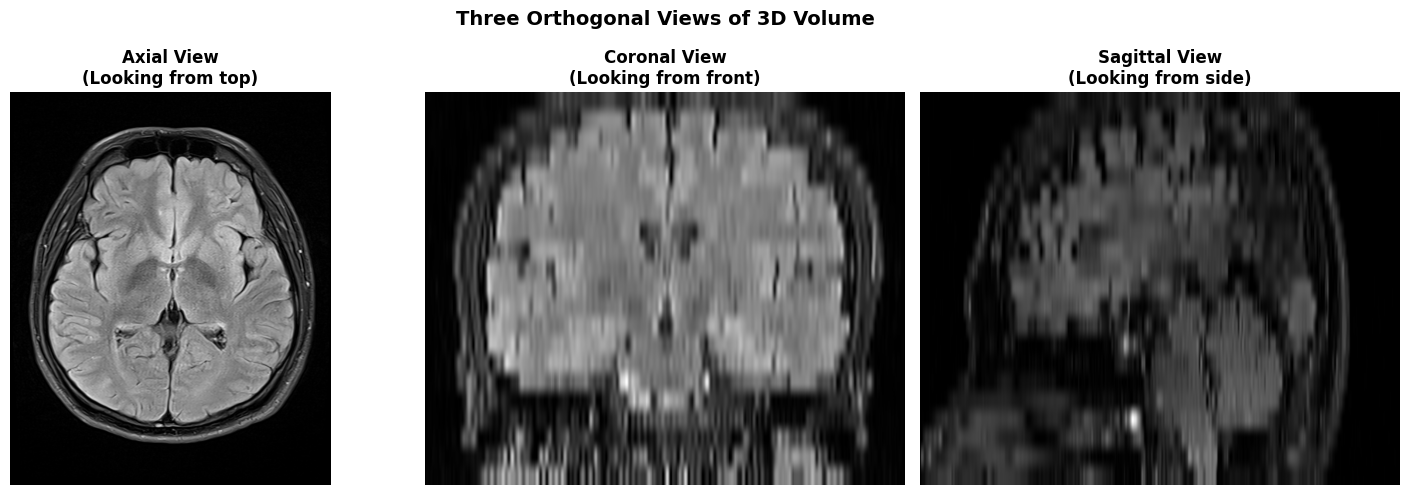


💡 In real radiology:
  • Axial = Cross-sections (slices)
  • Coronal = Front-to-back views
  • Sagittal = Side views
  Radiologists examine all three to make diagnoses!


In [152]:
# Create orthogonal views (axial, coronal, sagittal)

if 'volume' in locals() and volume is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial view (original - looking from top)
    axial_slice = volume[volume.shape[0] // 2]
    axes[0].imshow(axial_slice, cmap='gray')
    axes[0].set_title('Axial View\n(Looking from top)', fontsize=12, fontweight='bold')
    axes[0].axis('off')

    # Coronal view (front-to-back)
    coronal_slice = volume[:, volume.shape[1] // 2, :]
    axes[1].imshow(coronal_slice, cmap='gray', aspect='auto')
    axes[1].set_title('Coronal View\n(Looking from front)', fontsize=12, fontweight='bold')
    axes[1].axis('off')

    # Sagittal view (side view)
    sagittal_slice = volume[:, :, volume.shape[2] // 2]
    axes[2].imshow(sagittal_slice, cmap='gray', aspect='auto')
    axes[2].set_title('Sagittal View\n(Looking from side)', fontsize=12, fontweight='bold')
    axes[2].axis('off')

    plt.suptitle('Three Orthogonal Views of 3D Volume', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n💡 In real radiology:")
    print("  • Axial = Cross-sections (slices)")
    print("  • Coronal = Front-to-back views")
    print("  • Sagittal = Side views")
    print("  Radiologists examine all three to make diagnoses!")

## Step 3.3: Interactive Slice Viewer (Bonus)

**TODO:** Create a simple slider to scroll through slices.

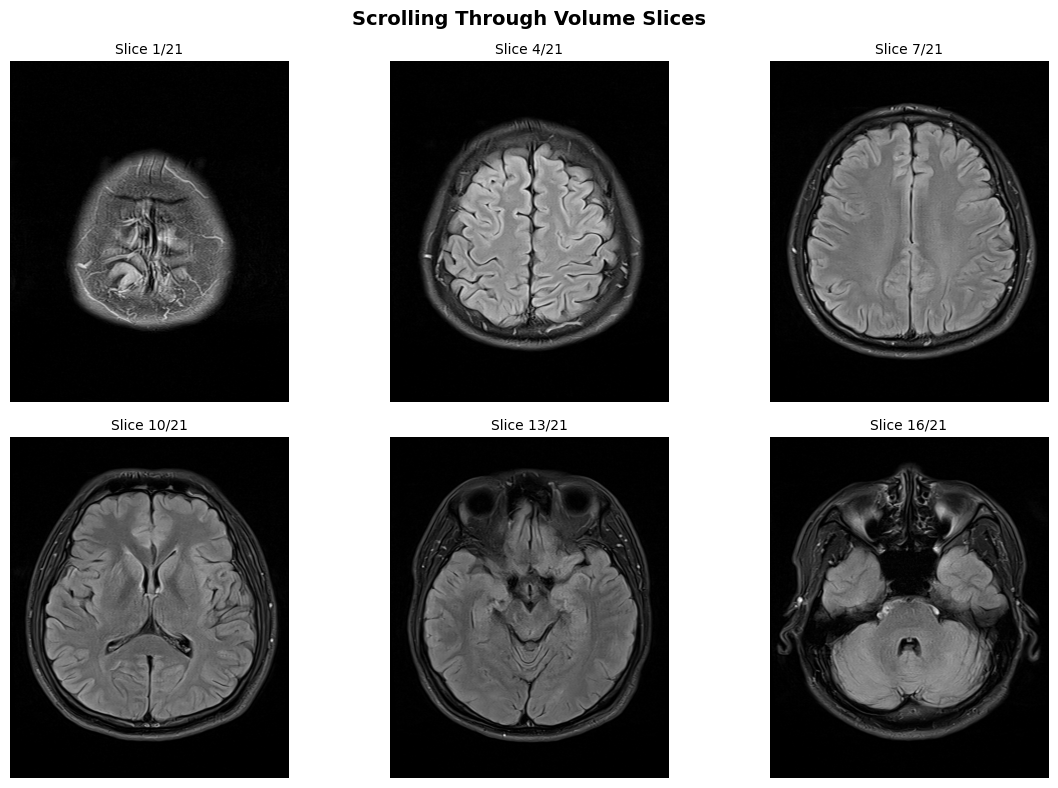


🎬 In real PACS systems:
  Radiologists scroll through hundreds of slices to find abnormalities
  AI can help by highlighting suspicious regions!


In [153]:
# Create an interactive slice viewer
# For simplicity, we'll just show a few slices in a grid

if 'volume' in locals() and volume is not None:
    # Show every other slice in a grid
    num_display = min(6, volume.shape[0])
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    step = max(1, volume.shape[0] // num_display)

    for i in range(num_display):
        slice_idx = min(i * step, volume.shape[0] - 1)
        # Display each slice
        axes[i].imshow(volume[slice_idx], cmap='gray')
        axes[i].set_title(f'Slice {slice_idx + 1}/{volume.shape[0]}', fontsize=10)
        axes[i].axis('off')

    plt.suptitle('Scrolling Through Volume Slices', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n🎬 In real PACS systems:")
    print("  Radiologists scroll through hundreds of slices to find abnormalities")
    print("  AI can help by highlighting suspicious regions!")

## 🎉 Part 3 Complete!

**Checkpoint:**
- ✅ Understood 3D volume structure
- ✅ Created orthogonal views
- ✅ Visualized multiple slices

**Key Insight:** Medical imaging is 3D! AI models often need to process entire volumes, not just single slices.

---

---

# 📡 PART 4: HL7 Messages (15 minutes)

## What is HL7?

**HL7** = Health Level Seven

**What it does:**
- DICOM handles images
- **HL7 handles everything else:** lab results, orders, prescriptions, admissions, billing, etc.

**Message Structure:**
```
MSH|^~\&|LAB|HOSPITAL|...
PID|1||12345||DOE^JOHN^...
OBR|1|...
OBX|1|...
```

- **MSH** = Message Header
- **PID** = Patient Identification  
- **OBR** = Observation Request
- **OBX** = Observation Result

---

## Step 4.1: Sample HL7 Message

Here's a real HL7 message (lab results):

In [154]:
# Sample HL7 v2.5 message (Lab Result - ORU^R01)
hl7_message = """MSH|^~\\&|LAB|HOSPITAL|PACS|HOSPITAL|20240220143052||ORU^R01|MSG00001|P|2.5
PID|1||12345||DOE^JOHN^||19800101|M|||123 MAIN ST^^CITY^ST^12345
OBR|1|ORD123|RES123|CBC^COMPLETE BLOOD COUNT|||20240220140000
OBX|1|NM|WBC^White Blood Cell Count||7.5|10^3/uL|4.0-11.0|N|||F
OBX|2|NM|RBC^Red Blood Cell Count||4.8|10^6/uL|4.5-5.5|N|||F
OBX|3|NM|HGB^Hemoglobin||14.2|g/dL|13.5-17.5|N|||F
OBX|4|NM|PLT^Platelet Count||250|10^3/uL|150-400|N|||F"""

print("Sample HL7 Message:")
print("=" * 70)
print(hl7_message)
print("=" * 70)

Sample HL7 Message:
MSH|^~\&|LAB|HOSPITAL|PACS|HOSPITAL|20240220143052||ORU^R01|MSG00001|P|2.5
PID|1||12345||DOE^JOHN^||19800101|M|||123 MAIN ST^^CITY^ST^12345
OBR|1|ORD123|RES123|CBC^COMPLETE BLOOD COUNT|||20240220140000
OBX|1|NM|WBC^White Blood Cell Count||7.5|10^3/uL|4.0-11.0|N|||F
OBX|2|NM|RBC^Red Blood Cell Count||4.8|10^6/uL|4.5-5.5|N|||F
OBX|3|NM|HGB^Hemoglobin||14.2|g/dL|13.5-17.5|N|||F
OBX|4|NM|PLT^Platelet Count||250|10^3/uL|150-400|N|||F


## Step 4.2: Parse HL7 Message

**TODO:** Create a simple parser to extract information from the HL7 message.

In [155]:
# TODO: Create an HL7 parser

def parse_hl7_message(message):
    """
    Simple HL7 v2.x message parser

    Args:
        message: HL7 message string

    Returns:
        dict: Parsed message data
    """
    # TODO: Split message into lines (segments)
    lines = message.strip().split('\n')

    parsed = {}

    for line in lines if lines else []:
        # TODO: Split each line by | (field separator)
        fields = line.split('|')

        segment_type = fields[0] if fields else None

        # TODO: Parse different segment types
        if segment_type == 'MSH':
            # Message Header
            parsed['MSH'] = {
                'Sending Application': fields[2],
                'Sending Facility': fields[3],
                'Message Type': fields[8],
                'Message ID': fields[9]
            }

        elif segment_type == 'PID':
            # Patient Identification
            parsed['PID'] = {
                'Patient ID': fields[3],
                'Patient Name': fields[5],
                'Birth Date': fields[7],
                'Sex': fields[8]
            }

        elif segment_type == 'OBR':
            # Observation Request
            parsed['OBR'] = {
                'Order ID': fields[2],
                'Accession Number': fields[3],
                'Test': fields[4],
                'Observation DateTime': fields[7]
            }

        elif segment_type == 'OBX':
            # Observation Results
            if 'OBX' not in parsed:
                parsed['OBX'] = []

            # TODO: Extract result
            result = {
                'Test Name': fields[3],
                'Value': fields[5],
                'Units': fields[6],
                'Reference Range': fields[7],
                'Abnormal Flag': fields[8]
            }

            parsed['OBX'].append(result)

    return parsed


# TODO: Test the parser
parsed_hl7 = parse_hl7_message(hl7_message)



# Display parsed data
if parsed_hl7:
    print("\nParsed HL7 Message:")
    print("=" * 70)

    for segment, data in parsed_hl7.items():
        print(f"\n{segment}:")
        if isinstance(data, list):
            for i, item in enumerate(data, 1):
                print(f"  Result {i}:")
                for key, value in item.items():
                    print(f"    {key:<18}: {value}")
        else:
            for key, value in data.items():
                print(f"  {key:<20}: {value}")


Parsed HL7 Message:

MSH:
  Sending Application : LAB
  Sending Facility    : HOSPITAL
  Message Type        : ORU^R01
  Message ID          : MSG00001

PID:
  Patient ID          : 12345
  Patient Name        : DOE^JOHN^
  Birth Date          : 19800101
  Sex                 : M

OBR:
  Order ID            : ORD123
  Accession Number    : RES123
  Test                : CBC^COMPLETE BLOOD COUNT
  Observation DateTime: 20240220140000

OBX:
  Result 1:
    Test Name         : WBC^White Blood Cell Count
    Value             : 7.5
    Units             : 10^3/uL
    Reference Range   : 4.0-11.0
    Abnormal Flag     : N
  Result 2:
    Test Name         : RBC^Red Blood Cell Count
    Value             : 4.8
    Units             : 10^6/uL
    Reference Range   : 4.5-5.5
    Abnormal Flag     : N
  Result 3:
    Test Name         : HGB^Hemoglobin
    Value             : 14.2
    Units             : g/dL
    Reference Range   : 13.5-17.5
    Abnormal Flag     : N
  Result 4:
    Test Name 

## Step 4.3: Understand the Data

**TODO:** Answer these questions based on the parsed HL7 message.

In [156]:
# TODO: Extract specific information from the parsed message

if parsed_hl7:
    print("\n📋 Clinical Information:")
    print("=" * 70)

    # Patient info
    if 'PID' in parsed_hl7:
        print(f"Patient: {parsed_hl7['PID'].get('Patient Name', 'N/A')}")
        print(f"ID: {parsed_hl7['PID'].get('Patient ID', 'N/A')}")
        print(f"Date of Birth: {parsed_hl7['PID'].get('Birth Date', 'N/A')}")

    # Test info
    if 'OBR' in parsed_hl7:
        print(f"\nTest Ordered: {parsed_hl7['OBR'].get('Test', 'N/A')}")
        print(f"Accession Number: {parsed_hl7['OBR'].get('Accession Number', 'N/A')}")

    # Results
    if 'OBX' in parsed_hl7:
        print("\nLab Results:")
        for result in parsed_hl7['OBX']:
            test = result.get('Test Name', 'N/A')
            value = result.get('Value', 'N/A')
            units = result.get('Units', '')
            ref_range = result.get('Reference Range', 'N/A')

            print(f"  • {test}: {value} {units} (normal: {ref_range})")

    print("\n💡 This data would be linked to DICOM images via the Accession Number!")


📋 Clinical Information:
Patient: DOE^JOHN^
ID: 12345
Date of Birth: 19800101

Test Ordered: CBC^COMPLETE BLOOD COUNT
Accession Number: RES123

Lab Results:
  • WBC^White Blood Cell Count: 7.5 10^3/uL (normal: 4.0-11.0)
  • RBC^Red Blood Cell Count: 4.8 10^6/uL (normal: 4.5-5.5)
  • HGB^Hemoglobin: 14.2 g/dL (normal: 13.5-17.5)
  • PLT^Platelet Count: 250 10^3/uL (normal: 150-400)

💡 This data would be linked to DICOM images via the Accession Number!


## 🎉 Part 4 Complete!

**Checkpoint:**
- ✅ Understood HL7 message structure
- ✅ Parsed an HL7 message
- ✅ Extracted clinical data

**Key Insight:** HL7 provides the clinical context that complements DICOM images!

---

---

# 🔗 PART 5: Integration - DICOM + HL7 (10 minutes)

## How They Work Together

**The Connection: Accession Number**

```
HL7 Order (ORM^O01):
  Accession Number: ACC00456
  Patient: John Doe
  Test: CT Chest
  
      ↓
      
DICOM Images Created:
  Accession Number: ACC00456
  Patient ID: 12345
  Modality: CT
  
      ↓
      
HL7 Result (ORU^R01):
  Accession Number: ACC00456
  Finding: "No abnormalities detected"
```

---

## Step 5.1: Simulate Complete Workflow

**TODO:** Show how HL7 and DICOM link together in a real radiology workflow.

In [157]:
# Simulate a radiology workflow

print("🏥 RADIOLOGY WORKFLOW SIMULATION")
print("=" * 70)

# Step 1: Doctor orders imaging
print("\n📝 Step 1: Doctor Orders CT Scan")
print("-" * 70)

hl7_order = """MSH|^~\\&|EMR|HOSPITAL|RIS|HOSPITAL|20240220090000||ORM^O01|ORD00123|P|2.5
PID|1||12345||DOE^JOHN^||19800101|M
ORC|NW|ORD00123|ACC00456|||20240220090000
OBR|1|ORD00123|ACC00456|CT^CT CHEST|||20240220090000"""

print(hl7_order)

# Extract accession number from order
accession_number = "ACC00456"  # In real code, parse from HL7
print(f"\n🔑 Accession Number Generated: {accession_number}")

# Step 2: Technician performs scan
print("\n\n🖼️ Step 2: Technician Performs CT Scan")
print("-" * 70)
print("• Patient positioned")
print("• Scan acquired")
print(f"• DICOM images created with Accession Number: {accession_number}")

# Simulate DICOM file with accession number
if dcm is not None:
    # In real DICOM, accession number would be in tag (0008,0050)
    print(f"\n  DICOM Metadata:")
    print(f"    Patient ID: {dcm.PatientID}")
    print(f"    Modality: {dcm.Modality}")
    print(f"    Accession Number: {accession_number}  ← Links to HL7 order!")

# Step 3: Images sent to PACS
print("\n\n💾 Step 3: Images Stored in PACS")
print("-" * 70)
print("• DICOM images transmitted to PACS")
print(f"• Stored under Accession Number: {accession_number}")
print("• Available for radiologist review")

# Step 4: Radiologist reads
print("\n\n👨‍💼 Step 4: Radiologist Reviews Images")
print("-" * 70)
print(f"• Retrieves study using Accession Number: {accession_number}")
print("• Reviews all DICOM images")
print("• Creates diagnostic report")

# Step 5: Report sent back
print("\n\n📄 Step 5: Report Sent to EMR")
print("-" * 70)

hl7_result = f"""MSH|^~\\&|RIS|HOSPITAL|EMR|HOSPITAL|20240220150000||ORU^R01|RES00123|P|2.5
PID|1||12345||DOE^JOHN^||19800101|M
OBR|1|ORD00123|{accession_number}|CT^CT CHEST|||20240220140000
OBX|1|TX|FINDING||No acute abnormalities detected|||N|||F
OBX|2|TX|IMPRESSION||Normal chest CT|||N|||F"""

print(hl7_result)

print("\n\n✅ Complete Workflow:")
print("=" * 70)
print(f"1. HL7 Order created → Accession: {accession_number}")
print(f"2. DICOM images created → Tagged with Accession: {accession_number}")
print(f"3. Images stored in PACS")
print(f"4. Radiologist reviews using Accession: {accession_number}")
print(f"5. HL7 Result sent back → References Accession: {accession_number}")
print("\n🔑 Everything linked by the Accession Number!")

🏥 RADIOLOGY WORKFLOW SIMULATION

📝 Step 1: Doctor Orders CT Scan
----------------------------------------------------------------------
MSH|^~\&|EMR|HOSPITAL|RIS|HOSPITAL|20240220090000||ORM^O01|ORD00123|P|2.5
PID|1||12345||DOE^JOHN^||19800101|M
ORC|NW|ORD00123|ACC00456|||20240220090000
OBR|1|ORD00123|ACC00456|CT^CT CHEST|||20240220090000

🔑 Accession Number Generated: ACC00456


🖼️ Step 2: Technician Performs CT Scan
----------------------------------------------------------------------
• Patient positioned
• Scan acquired
• DICOM images created with Accession Number: ACC00456

  DICOM Metadata:
    Patient ID: Ultra_fast_Brain
    Modality: MR
    Accession Number: ACC00456  ← Links to HL7 order!


💾 Step 3: Images Stored in PACS
----------------------------------------------------------------------
• DICOM images transmitted to PACS
• Stored under Accession Number: ACC00456
• Available for radiologist review


👨‍💼 Step 4: Radiologist Reviews Images
----------------------------------

## Step 5.2: Why This Matters for AI

**TODO:** Explain how understanding these standards helps build better medical AI.

In [158]:
print("💡 WHY AI ENGINEERS NEED TO KNOW DICOM & HL7")
print("=" * 70)

print("\n1️⃣ DATA ACCESS:")
print("   • Real medical data is in DICOM format")
print("   • Clinical context comes from HL7 messages")
print("   • Can't just use JPG/PNG - you lose critical metadata!")

print("\n2️⃣ DEPLOYMENT:")
print("   • AI models must integrate into hospital workflows")
print("   • Must read DICOM, output in DICOM")
print("   • Must link to HL7 systems (EMR, RIS, PACS)")

print("\n3️⃣ QUALITY:")
print("   • Pixel spacing → Real-world measurements (8mm nodule, not 20 pixels!)")
print("   • Hounsfield Units → Tissue density (critical for CT)")
print("   • Window/Level → Proper visualization")
print("   • Clinical context → Better predictions")

print("\n4️⃣ COMPLIANCE:")
print("   • HIPAA requires secure handling")
print("   • Standards define security models")
print("   • Audit trails built into protocols")

print("\n" + "=" * 70)
print("📚 BOTTOM LINE: You can't build medical AI without understanding these standards!")
print("=" * 70)

💡 WHY AI ENGINEERS NEED TO KNOW DICOM & HL7

1️⃣ DATA ACCESS:
   • Real medical data is in DICOM format
   • Clinical context comes from HL7 messages
   • Can't just use JPG/PNG - you lose critical metadata!

2️⃣ DEPLOYMENT:
   • AI models must integrate into hospital workflows
   • Must read DICOM, output in DICOM
   • Must link to HL7 systems (EMR, RIS, PACS)

3️⃣ QUALITY:
   • Pixel spacing → Real-world measurements (8mm nodule, not 20 pixels!)
   • Hounsfield Units → Tissue density (critical for CT)
   • Window/Level → Proper visualization
   • Clinical context → Better predictions

4️⃣ COMPLIANCE:
   • HIPAA requires secure handling
   • Standards define security models
   • Audit trails built into protocols

📚 BOTTOM LINE: You can't build medical AI without understanding these standards!


## 🎉 Part 5 Complete!

**Checkpoint:**
- ✅ Understood how DICOM and HL7 connect
- ✅ Simulated a complete radiology workflow
- ✅ Recognized why standards matter for AI

**Key Insight:** DICOM + HL7 work together to create a complete picture of the patient!

---

---

# 🎓 Lab 4 Summary

## What You Accomplished Today:

### ✅ DICOM Skills:
1. Loaded and parsed DICOM files
2. Extracted valuable metadata
3. Applied Hounsfield Unit conversion
4. Implemented window/level adjustments
5. Created 3D volume visualizations

### ✅ HL7 Skills:
1. Understood HL7 message structure
2. Parsed clinical data messages
3. Extracted patient and lab information

### ✅ Integration:
1. Saw how DICOM and HL7 link via accession numbers
2. Understood complete radiology workflows
3. Recognized why standards matter for medical AI

---

## 🔍 Reflection Questions

**Answer these to deepen your understanding:**

### Question 1: Why Standards Matter

**Q:** Before DICOM and HL7, what problems did hospitals face?

**Your Answer:**

Before DICOM and HL7, hospital systems could not communicate with each other. Different machines used different formats, leading to manual data entry, errors, delays, and lost information. Standards solved this by creating a common language for medical data.

---

### Question 2: DICOM vs Regular Images

**Q:** What critical information would you lose if you converted a DICOM file to JPG?

**Your Answer:**

If you convert DICOM to JPG, you lose important metadata such as patient information, scan parameters (like slice thickness and pixel spacing), and CT scaling data (Hounsfield Units). The file becomes just an image, not a full medical record.

---

### Question 3: Windowing Impact

**Q:** Why do radiologists use different window settings? Give a specific example.

**Your Answer:**

Radiologists use different window settings to highlight different tissues. For example, a lung window shows air spaces clearly, while a bone window highlights fractures. The same scan looks different depending on the diagnostic need.

---

### Question 4: Clinical Integration

**Q:** How do DICOM images and HL7 messages link together in a hospital? What's the key identifier?

**Your Answer:**

DICOM images and HL7 messages are linked using the Accession Number. HL7 carries patient and order information, and DICOM references the same identifier so images match the correct clinical record.

---

### Question 5: AI Applications

**Q:** You're building an AI model to detect lung nodules in CT scans. Why is pixel spacing metadata critical?

**Your Answer:**

Pixel spacing tells the real-world size of each pixel. Without it, an AI model cannot accurately measure things like lung nodules, which is critical for diagnosis and treatment decisions.
---

## 🚀 Next Steps

### This Week:
- Review DICOM tags documentation
- Explore sample datasets from TCIA
- Practice with different modalities (CT, MRI, X-ray)

### Next Week:
- Imaging modalities deep dive
- When to use CT vs MRI vs X-ray
- Hospital visit preparation

### Coming Soon:
- Hospital visit to see PACS/RIS in action!
- CNNs for medical imaging
- Using DICOM metadata to improve AI models

---

## 📚 Additional Resources

### DICOM:
- pydicom documentation: https://pydicom.github.io/
- DICOM Standard: https://www.dicomstandard.org/
- Sample datasets: https://www.cancerimagingarchive.net/

### HL7:
- HL7 Introduction: https://www.hl7.org/
- FHIR (modern HL7): https://www.hl7.org/fhir/
- python-hl7 library: https://python-hl7.readthedocs.io/

### Tools:
- RadiAnt DICOM Viewer (free): https://www.radiantviewer.com/
- 3D Slicer (open source): https://www.slicer.org/

---

## 📤 Submission Instructions

1. **Complete all TODOs** in this notebook
2. **Answer reflection questions**
3. **Test your code** - make sure everything runs
4. **Save:** File → Download → .ipynb
5. **Name:** `Lab4_DICOM_HL7_LastName1_LastName2.ipynb`
6. **Submit to Blackboard** by [deadline]

---

## 🎉 Congratulations!

You now understand the fundamental standards that power medical imaging worldwide!

**You can:**
- ✅ Read and manipulate DICOM files
- ✅ Extract clinical metadata
- ✅ Apply proper medical image windowing
- ✅ Parse HL7 messages
- ✅ Understand hospital IT workflows

**This knowledge is essential for building real-world medical AI systems!** 🚀🏥

---